## Executive Summary
------------------------------

This case study presents an exploratory data analysis (EDA) of customer credit card transactions from January 2022 to December 2023 to uncover key purchasing behaviors, spending trends, and potential areas for business growth.


### **Key Findings**:
------------------------------
- **Age Group 25-35 Dominates Spending**: This segment contributes the highest number of purchases, making it a crucial target for marketing campaigns.


- **Seasonality Effect**: Sales peak during the holiday season, particularly in December, highlighting an opportunity for seasonal promotions.


- **Customer Segments Identified**:

  - Frequent Buyers: High-value customers with consistent spending patterns.
 
  - Occasional Buyers: Moderate spenders with sporadic transactions.

  - Inactive Customers: Minimal to no recent activity, indicating a need for retention strategies.


### **Business Implications**:
--------------------------------
These insights can help optimize customer retention, refine credit approval strategies, and personalize marketing efforts to enhance revenue growth. The findings also provide a foundation for predictive modeling and customer segmentation, allowing the business to tailor services to different customer groups effectively.

## Problem Statement
-------------------------------

This analysis aims to support business growth and improve customer engagement by analyzing credit card approval patterns and spending behaviors. Specifically, the study will:

1. *Identify key factors influencing credit card approvals to help the bank streamline the approval process.*
2. *Segment customers based on spending habits and credit history to improve retention strategies and revenue generation.*
3. *Detect potential risks in credit approvals by analyzing financial behavior, spending trends, and customer demographics.*

## Dataset
---------------

This study analyzes credit card transaction and approval data from January 2022 to December 2023, focusing on customer spending behaviors and approval trends. The dataset includes:

- **Customer Demographics:** Age, gender, location, homeownership, self-employment status.

- **Credit History:** Number of active accounts, major credit cards held, derogatory reports.

- **Purchase Behavior:** Transaction date, spending amount, expenditure-to-income ratio, product categories.

- **Credit Card Approval Status:** Whether a credit card application was accepted or rejected.

## Methodology
---------------

1. **Data Collection:** Sourced from internal banking records, including transaction histories and credit applications.

<br>

2. **Data Preparation:**

  - Handled missing values using median imputation.

  - Removed duplicate records.

  - Standardized numerical variables (income, expenditure, share).

  - Encoded categorical variables (homeownership, self-employment).

  - Identified and treated outliers in expenditure and income data.

<br> 

3. **Tools Used:**
  - Python (Pandas, Matplotlib, Seaborn, NumPy) for EDA, 
  - SciPy for statistical analysis, 
  - Scikit-learn for predictive modeling (logistic regression, clustering).

## Data Exploration Overview
-------------------------------------

After data preparation, a preliminary exploration was conducted to understand dataset characteristics, including:


- **Summary Statistics:** Mean, median, standard deviation of key numerical variables.

- **Data Distribution:** Histograms, box plots, and skewness/kurtosis analysis to identify outliers.

- **Missing Values Check:** Ensured that imputation techniques effectively handled missing data.

- **Correlation Analysis:** Examined relationships between income, expenditure, and credit card approval.

## Dependencies

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.cluster import KMeans
from scipy.stats import mannwhitneyu
from sklearn.decomposition import PCA
from scipy.stats import chi2_contingency
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

## Read Dataset

In [2]:
creditcard_data = pd.read_csv(filepath_or_buffer = '../data/CreditCard.csv',
                              index_col          = 0)

## Define Business Case

***The business problem we want to solve here: to find the effect of each of the variables separately on the "Credit card approval", and how collectively they are affecting the same response variable, so the bank could choose the most important variables out of these for running their quick customer diagnostics before approving a credit card.*** 

## Variable Description

After understanding the business case, we need to know our variables before analyzing them. 

Thus we have a clear understanding as we go further.


<table style="font-size: 14px;">
    <thead>
        <tr>
            <th>Variable</th>
            <th>Description</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td><strong>card</strong></td>
            <td>Factor. Was the application for a credit card accepted?</td>
        </tr>
        <tr>
            <td><strong>reports</strong></td>
            <td>Number of major derogatory reports</td>
        </tr>
        <tr>
            <td><strong>age</strong></td>
            <td>Age in years plus twelfths of a year</td>
        </tr>
        <tr>
            <td><strong>income</strong></td>
            <td>Yearly income (in USD 10,000)</td>
        </tr>
        <tr>
            <td><strong>share</strong></td>
            <td>Ratio of monthly credit card expenditure to yearly income</td>
        </tr>
        <tr>
            <td><strong>expenditure</strong></td>
            <td>Average monthly credit card expenditure</td>
        </tr>
        <tr>
            <td><strong>owner</strong></td>
            <td>Factor. Does the individual own their home?</td>
        </tr>
        <tr>
            <td><strong>selfemp</strong></td>
            <td>Factor. Is the individual self-employed?</td>
        </tr>
        <tr>
            <td><strong>dependents</strong></td>
            <td>Number of dependents</td>
        </tr>
        <tr>
            <td><strong>months</strong></td>
            <td>Months living at current address</td>
        </tr>
        <tr>
            <td><strong>majorcards</strong></td>
            <td>Number of major credit cards held</td>
        </tr>
        <tr>
            <td><strong>active</strong></td>
            <td>Number of active credit accounts</td>
        </tr>
    </tbody>
</table>

## Data Understanding

Now we understood our business case and imported the data we need in CSV format, let's see the first 5 rows of the dataset.


In [3]:
creditcard_data.head()

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5


### Overview of the dataset : Check the structure, number of rows, and columns

In [4]:
creditcard_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1319 entries, 1 to 1319
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   object 
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 134.0+ KB


### Check for missing values

In [5]:
creditcard_data.isnull().sum()


card           0
reports        0
age            0
income         0
share          0
expenditure    0
owner          0
selfemp        0
dependents     0
months         0
majorcards     0
active         0
dtype: int64

### Fill missing values with median

In [6]:
creditcard_data.fillna(value   = creditcard_data.select_dtypes(include=['number']).median(), 
                       inplace = True)

creditcard_data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12
2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13
3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5
4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7
5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1315,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19
1316,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5
1317,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2
1318,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7


We see that we have 12 variables and 1319 observations for the dataset. 

Seems like there are no missing values in the dataframe.

# Univariate Analysis

### Response Variable (card):

- Count plot to visualize the distribution of credit card approvals.

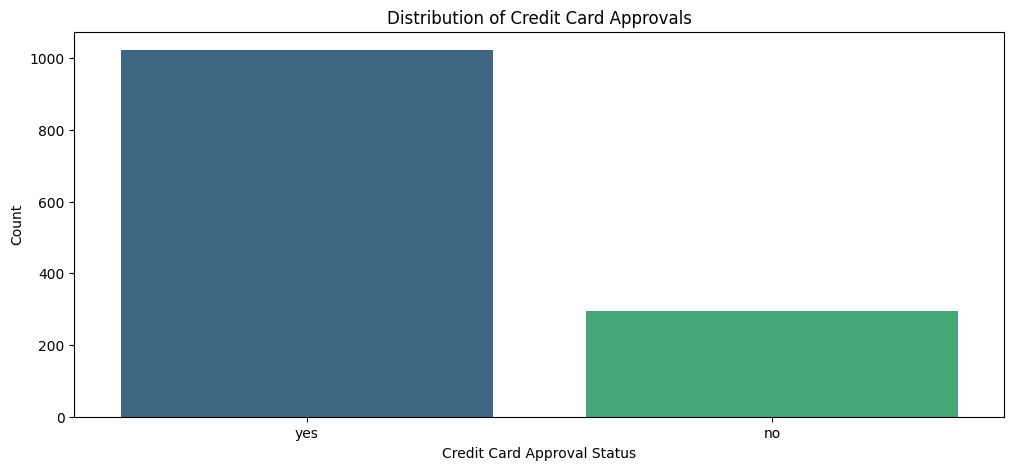

In [7]:
# Count plot for the response variable 'card'
plt.figure(figsize = (12, 5))

sns.countplot(x       ='card', 
              data    = creditcard_data,
              palette = 'viridis')

plt.title('Distribution of Credit Card Approvals')
plt.xlabel('Credit Card Approval Status')
plt.ylabel('Count')
plt.show()


### Numerical Variables (reports, age, income, share, expenditure, dependents, months, majorcards, active)

#### Histograms to check the distribution of each variable

<Figure size 1600x1200 with 0 Axes>

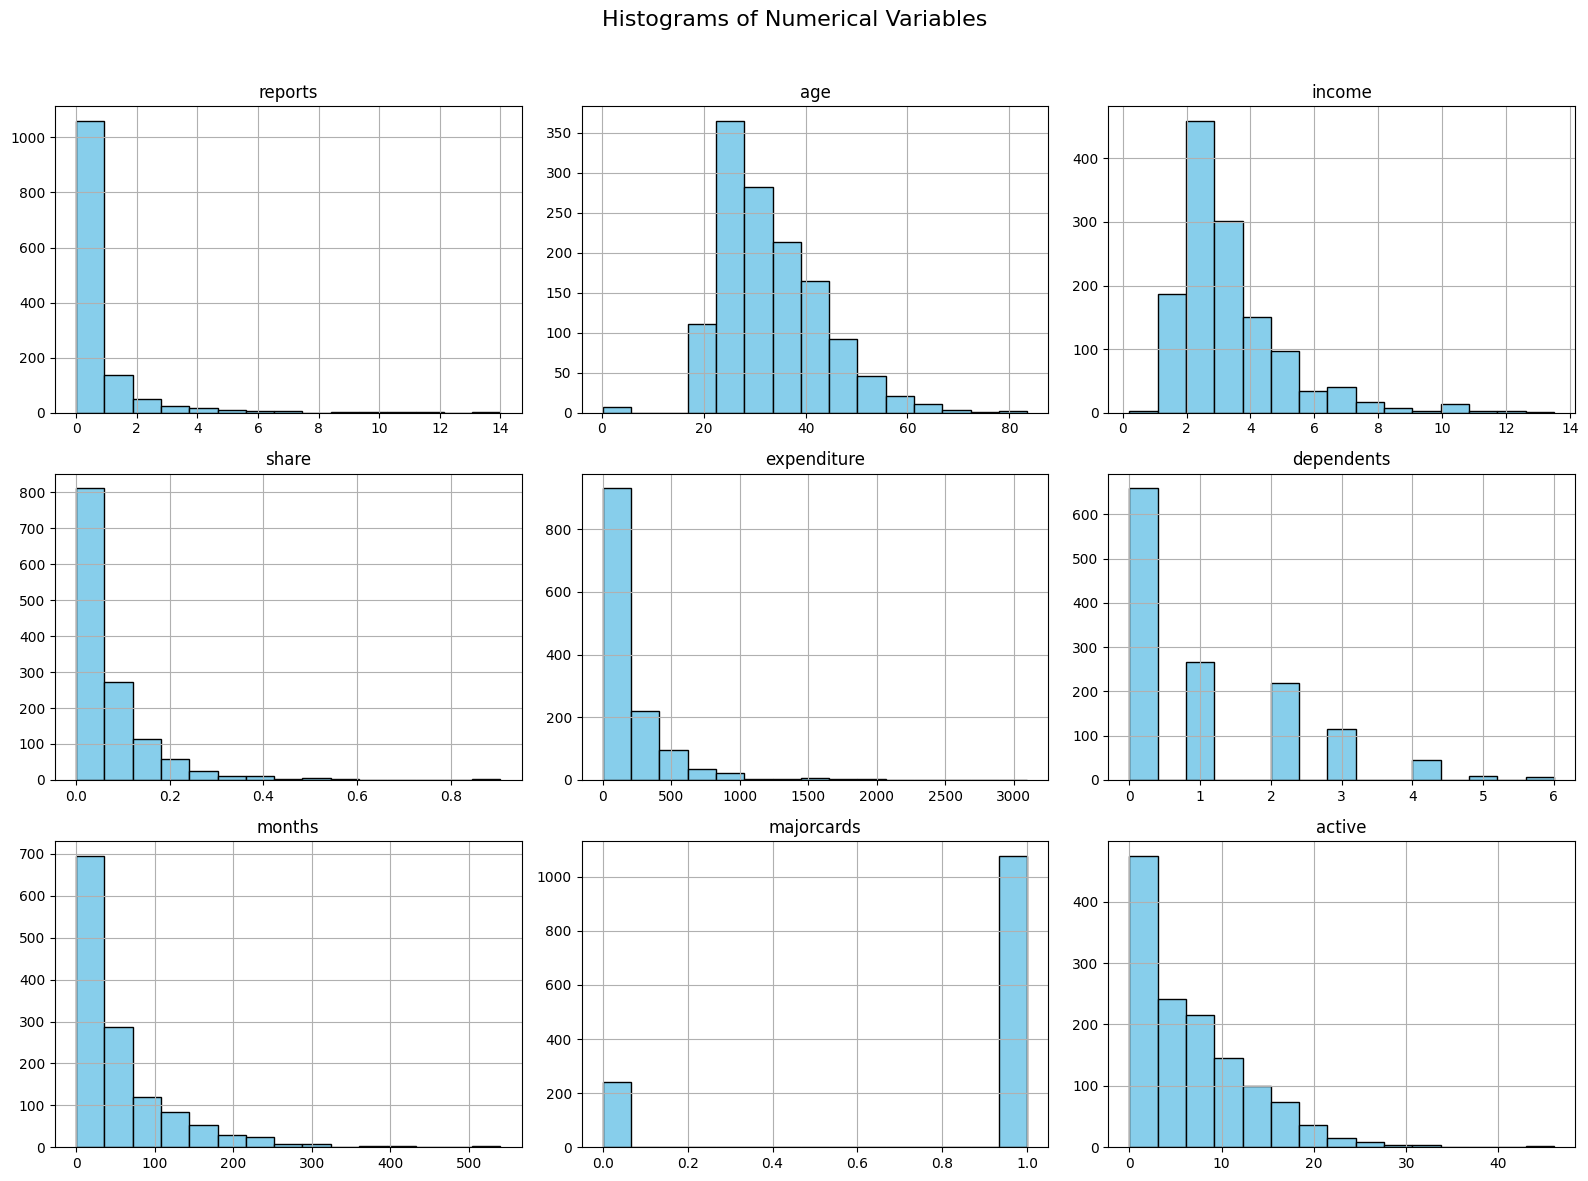

In [8]:
# Setting up the plotting size
plt.figure(figsize = (16, 12))

# Plotting Histograms for numerical variables
num_cols = ['reports', 
            'age', 
            'income', 
            'share', 
            'expenditure', 
            'dependents', 
            'months', 
            'majorcards', 
            'active']

creditcard_data[num_cols].hist(bins      = 15, 
                               color     = 'skyblue', 
                               edgecolor = 'black', 
                               layout    = (3, 3), 
                               figsize   = (16, 12))

plt.suptitle('Histograms of Numerical Variables', fontsize=16)
plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()


### Histograms Distribution Insights
======================================

- Age: The distribution seems skewed towards younger ages, with a majority of applicants being in their 30s or 40s.

- Reports: Many applicants have zero derogatory reports, but there are a few with higher values, which suggests a heavy tail.

- Income: The income distribution shows a right skew, meaning most applicants have lower yearly income levels, but a few have significantly higher incomes.

- Share: This ratio of monthly credit card expenditure to yearly income is mostly low for applicants, but with a small number of high values.

- Expenditure: A large number of applicants have relatively low monthly expenditures, with a few outliers having much higher spending patterns.

- Dependents, Months, Majorcards, Active Accounts: These variables also have skewed distributions, indicating that most applicants have fewer dependents, have not lived long at their current address, own fewer credit cards, and have fewer active accounts.

#### Boxplots to identify outliers for numerical variables

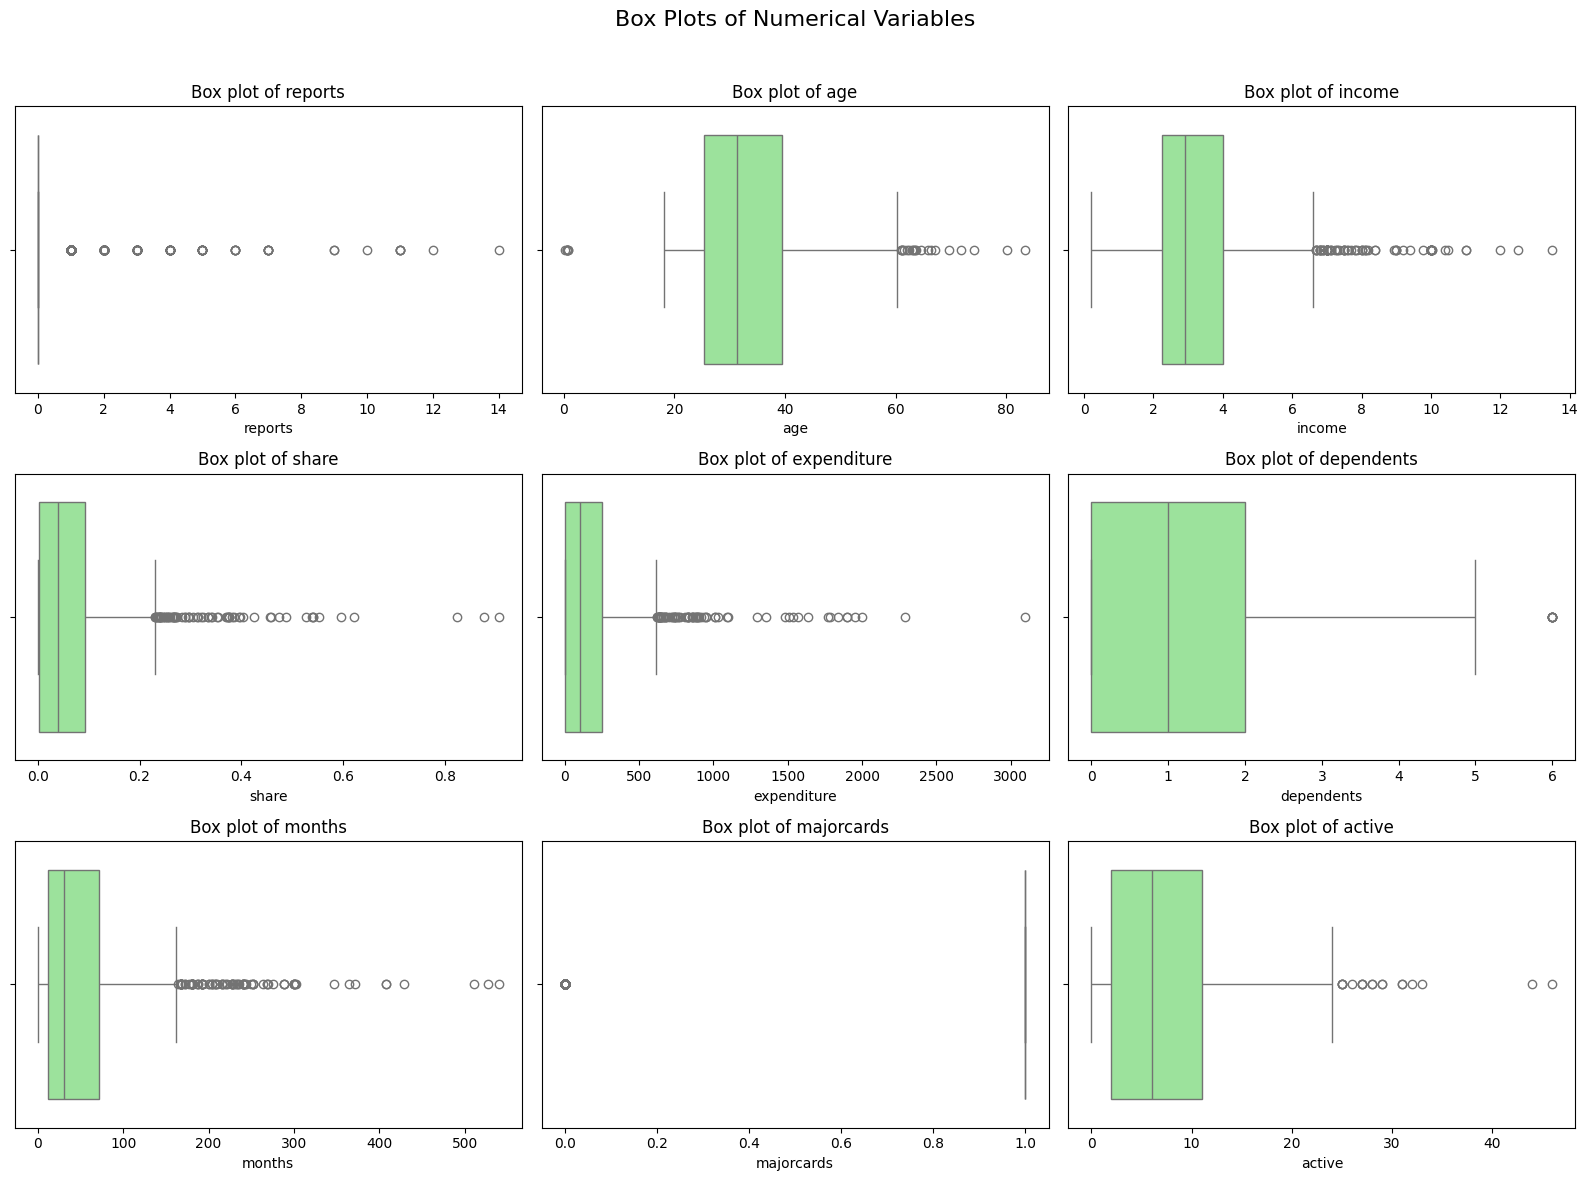

In [9]:
# Plotting Boxplots to identify outliers for numerical variables
plt.figure(figsize = (16, 12))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    
    sns.boxplot(data  = creditcard_data, 
                x     = col, 
                color = 'lightgreen')
    
    plt.title(f'Box plot of {col}')

plt.suptitle('Box Plots of Numerical Variables', fontsize=16)
plt.tight_layout(rect = [0, 0, 1, 0.96])
plt.show()

### Box Plots Outlier Insights:
===============================

- Reports, Share, Expenditure, and Income: These variables show significant outliers, particularly in the upper range. For example, some individuals have very high derogatory reports, large credit card expenditures, and high-income values.

- Age and Majorcards: These variables appear to have fewer extreme outliers, indicating a more stable distribution.

- Dependents, Months, Active: There are a few outliers, but generally, the values are more concentrated around the lower end.

#### Summary statistics for numerical variables

In [10]:
summary_stats = creditcard_data[num_cols].describe()
summary_stats

,reports,age,income,share,expenditure,dependents,months,majorcards,active
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,0.456406,33.213103,3.365376,0.068732,185.057071,0.993935,55.267627,0.817286,6.996967
std,1.345267,10.142783,1.693902,0.094656,272.218917,1.247745,66.271746,0.386579,6.305812
min,0.000000,0.166667,0.210000,0.000109,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,25.416670,2.243750,0.002316,4.583333,0.000000,12.000000,1.000000,2.000000
50%,0.000000,31.250000,2.900000,0.038827,101.298300,1.000000,30.000000,1.000000,6.000000
75%,0.000000,39.416670,4.000000,0.093617,249.035800,2.000000,72.000000,1.000000,11.000000
max,14.000000,83.500000,13.500000,0.906320,3099.505000,6.000000,540.000000,1.000000,46.000000


###  Summary Statistics / Central Tendencies and Spread:
===========================================================

- Mean vs Median: For several variables (e.g., income, expenditure, share), the mean is higher than the median, indicating skewness. This is particularly true for income and expenditure, where a few high-value applicants skew the mean upwards.


- Reports: The median is 0, but the mean is higher, reflecting the presence of outliers.


- Age: The age of applicants is centered around the mid-30s (median age ~34), indicating the target demographic.


- Expenditure: The average monthly expenditure is relatively low for most people, but the presence of outliers causes the mean to be larger.


- Active Accounts, Major Cards: Most applicants have fewer active accounts and major cards, indicating potentially limited credit histories for a large portion of the dataset.

#### Bar plots for categorical variables (owner, selfemp)

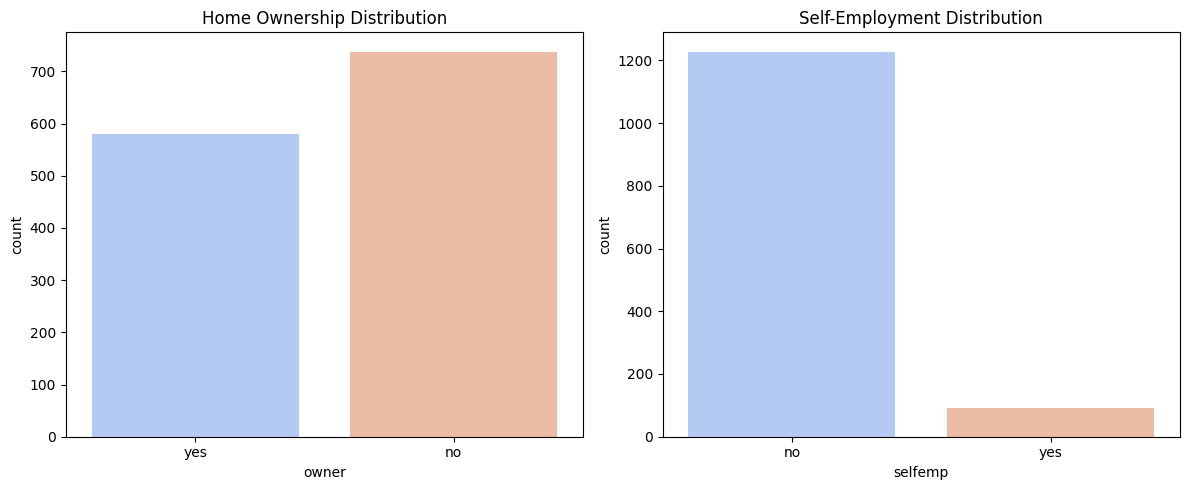

In [11]:
# Plotting Bar plots for categorical variables (owner, selfemp)
plt.figure(figsize = (12, 5))

plt.subplot(1, 2, 1)

sns.countplot(x       ='owner', 
              data    = creditcard_data, 
              palette = 'coolwarm')

plt.title('Home Ownership Distribution')

plt.subplot(1, 2, 2)

sns.countplot(x       = 'selfemp', 
              data    = creditcard_data, 
              palette = 'coolwarm')

plt.title('Self-Employment Distribution')

plt.tight_layout()
plt.show()

### Bar Plots Categorical Insights:
===================================

- Owner: More applicants own their homes than those who do not, which could be an important factor when considering credit card approvals.


- Self-Employment: The number of self-employed individuals is relatively small, suggesting self-employment might not be a major characteristic of this applicant pool.


### Skewness and Kurtosis Calculation for Numerical Variables

In [12]:
# Skewness and Kurtosis for all numerical variables
numerical_columns = ['reports', 
                     'age', 
                     'income', 
                     'share', 
                     'expenditure', 
                     'dependents', 
                     'months', 
                     'majorcards', 
                     'active']

total_data = dict()

for col in numerical_columns:
    skewness             = creditcard_data[col].skew()
    kurtosis             = creditcard_data[col].kurt()
    total_data.update({col : {'skewness' : skewness, 'kurtosis' : kurtosis}})
    
total_df = pd.DataFrame.from_dict(data   = total_data,
                                  orient = 'index').T


total_df

,reports,age,income,share,expenditure,dependents,months,majorcards,active
skewness,4.884221,0.841428,1.928085,3.167606,3.720321,1.234275,2.570304,-1.644000,1.213365
kurtosis,30.556681,1.472542,4.933327,16.253759,22.281899,1.092424,9.478653,0.703802,2.358621


### Variable-by-Variable Interpretation of Skewness and Kurtosis:
====================================================================

1) Reports:

- Skewness (4.88): Strong positive skewness indicates a right-skewed distribution, meaning most applicants have low or zero derogatory reports, but a few have very high values.

- Kurtosis (30.56): Extremely high kurtosis shows heavy tails with a few applicants having extremely high derogatory reports, making this variable prone to outliers.

- Insight: Most people have clean credit reports, but the few outliers with high reports could skew decision-making and should be treated with caution.

2) Age:

- Skewness (0.84): Slight positive skewness indicates the age distribution is somewhat right-skewed, with more applicants being younger but a small number of older applicants pulling the tail.

- Kurtosis (1.47): Kurtosis less than 3 indicates a light tail, meaning there aren’t many extreme outliers in the age distribution.

- Insight: The age distribution is relatively normal with a slight concentration of younger individuals but no significant outliers. Younger applicants might dominate the dataset.

3) Income:

- Skewness (1.93): Positive skewness means the income distribution is right-skewed, with a large number of people having lower incomes and a few outliers with high incomes.

- Kurtosis (4.93): High kurtosis indicates the presence of some extreme high-income outliers.

- Insight: Most applicants have low incomes, but a few with very high incomes skew the distribution. The presence of high-income outliers might need special attention, as they can affect models like logistic regression.

4) Share (Ratio of monthly credit card expenditure to yearly income):

- Skewness (3.17): High positive skewness shows that most people have low credit card expenditure compared to income, but there are a few who spend disproportionately more.

- Kurtosis (16.25): Extremely high kurtosis indicates heavy-tailed distribution with a few extreme outliers who spend significantly more than their income.

- Insight: A large number of applicants have conservative credit card spending, but some outliers are spending much more than their income ratio, which could indicate high-risk behavior.

5) Expenditure:

- Skewness (3.72): Positive skewness indicates most people have low monthly credit card expenditures, with a few applicants having very high spending.

- Kurtosis (22.28): Extremely high kurtosis shows heavy tails, meaning there are outliers with exceptionally high expenditures.

- Insight: While most applicants spend modestly, the few high-spenders can significantly influence decision-making. These high-expenditure outliers could either represent high-value customers or potential credit risks.

6) Dependents:

- Skewness (1.23): Positive skewness indicates that most applicants have few or no dependents, but there are a few with multiple dependents.

- Kurtosis (1.09): Low kurtosis indicates a light-tailed distribution, suggesting few extreme outliers.

- Insight: The number of dependents is mostly low, which is typical, but the skewness indicates that a few applicants have many dependents, possibly adding financial stress.

7) Months (Length of residence):

- Skewness (2.57): Positive skewness suggests most applicants have been living at their current address for a short period, but a few have lived much longer.

- Kurtosis (9.48): High kurtosis indicates heavy tails, meaning there are a few extreme outliers with very long residency periods.

- Insight: Most applicants have lived at their current address for shorter durations, but the outliers who have lived for very long periods might indicate stability, which is typically a positive signal in credit assessment.

8) Majorcards:

- Skewness (-1.64): Negative skewness indicates that the majority of applicants have 1 major credit card, but there are a few with no major credit cards, pulling the tail to the left.
- Kurtosis (0.70): Low kurtosis suggests a light-tailed distribution, indicating fewer extreme values or outliers.

- Insight: Most applicants have at least one major credit card, which is expected, but a small number of applicants without any credit history might face challenges in getting credit approval.

9) Active (Number of active credit accounts):

- Skewness (1.21): Positive skewness means most people have fewer active credit accounts, with a few applicants having many.

- Kurtosis (2.36): Kurtosis slightly below 3 indicates that the tails are not too heavy, suggesting that outliers are less extreme.

- Insight: Most applicants manage a small number of active credit accounts, which could indicate limited financial exposure. The higher number of active accounts in some cases could signal greater credit use, but not extreme.

---------------------

### Overall Insights from Skewness and Kurtosis:
===================================================

1) Right-Skewed Distributions: Variables such as reports, income, expenditure, share, and months are heavily right-skewed, meaning that most applicants fall in the lower end of these variables (e.g., low reports, low income, low expenditure), but there are some outliers with significantly higher values. These variables may require log transformation or outlier treatment to improve modeling performance, especially in regression-based models.

2) Heavy Tails (High Kurtosis): Variables like reports, income, share, expenditure, and months have high kurtosis, indicating the presence of outliers. Outlier detection methods, such as z-scores or interquartile ranges, could be used to handle these extreme values. Reports (derogatory credit reports) is particularly notable, as outliers here could heavily influence credit decisions.

3) Negative Skewness (Majorcards): The negative skewness of majorcards indicates that most applicants have at least one major credit card, which is likely favorable for credit approval, but those without any credit history could face challenges.

4) Data Normalization: For variables like reports, income, share, expenditure, and months, which have high skewness and kurtosis, transformations such as log transformation could help normalize the data distribution, making it easier to model effectively.

5) Target Variables for Further Analysis: The highly skewed and kurtotic variables (e.g., reports, income, share, expenditure) are likely key indicators of applicant financial behavior and risk. Closer examination of the outliers in these variables can reveal important customer segments, such as high-spending individuals or those with poor credit histories.


### Variable Binning (Bucketing)

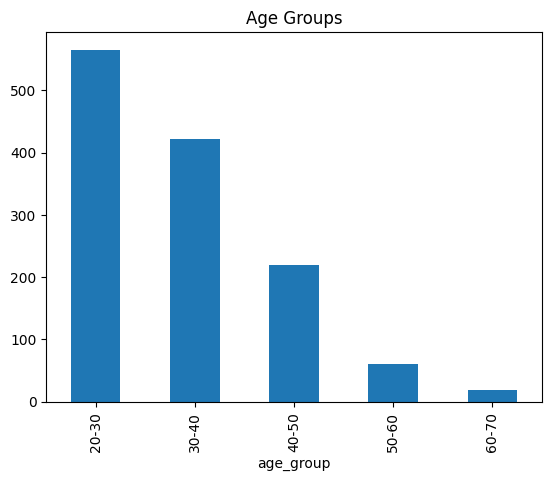

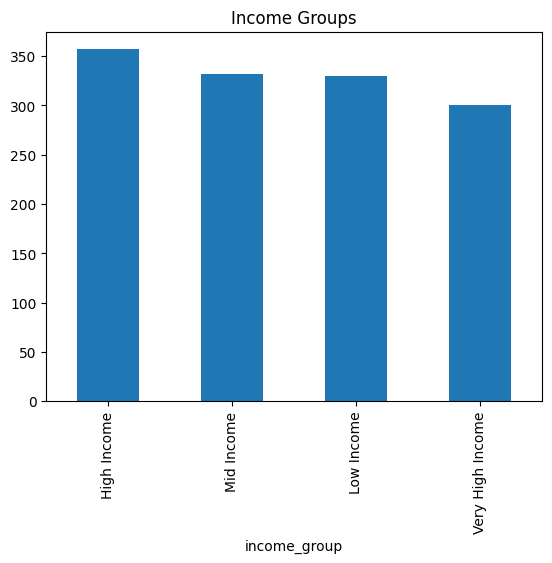

In [13]:
# Binning the age variable into categories
creditcard_data['age_group']    = pd.cut(x      = creditcard_data['age'], 
                                         bins   = [20, 30, 40, 50, 60, 70], 
                                         labels = ['20-30', '30-40', '40-50', '50-60', '60-70'])

# Binning income into categories
creditcard_data['income_group'] = pd.qcut(x      = creditcard_data['income'], 
                                          q      = 4, 
                                          labels = ['Low Income', 'Mid Income', 'High Income', 'Very High Income'])

# Display the newly created categories
creditcard_data[['age', 'age_group', 'income', 'income_group']].head()

# Bar plot for the binned age and income variables
creditcard_data['age_group'].value_counts().plot(kind  = 'bar', 
                                                 title = 'Age Groups')
plt.show()

creditcard_data['income_group'].value_counts().plot(kind  = 'bar', 
                                                    title = 'Income Groups')
plt.show()

### Insights from Binning the Age and Income Variables:
==========================================================

1) Age Groups:

From the binned age data, we can extract several insights:

- Distribution of Applicants: The bar plot of age groups showing how many applicants fall into each age category (e.g., 20-30, 30-40, etc.). As most applicants are concentrated in a particular age group (20-30), this is indicating that the bank's target demographic leans towards that age range, reflecting trends in credit card usage among different ages.

- Implications for Credit Strategy: As younger age groups (20-30) represent a significant portion, the bank might want to tailor products suitable for first-time credit card users, such as lower-limit cards or educational resources about credit management. Conversely, as older groups (50-60 or 60-70) are not that much using credit cards, this could suggest a need for products aimed at more financially stable consumers, possibly with higher credit limits and rewards tailored to their spending habits.

- Risk Assessment: There are high approval rates in certain age categories, the bank could use this data to fine-tune its risk assessment strategies. For instance, they might find that older applicants tend to have lower risk profiles compared to younger applicants, who might be newer to credit and could be viewed as higher risk.

------------------------------

2. Income Groups:

The binned income data also provides important insights:

- Income Distribution: The bar plot for income groups (e.g., Low Income, Mid Income, High Income, Very High Income) is illustrating how applicants are spread across income categories. If a large portion of applicants falls into the Low Income category, it might indicate a market segment that requires affordable credit options or financial education.

- Approval Rates and Risk Profiles: Analyzing approval rates across these income categories could reveal significant insights. For example, if Very High Income applicants have high approval rates, this aligns with expectations, as they are often viewed as lower risk. Conversely, if Low Income applicants have a high rejection rate, this might indicate the need for the bank to develop more inclusive credit products, perhaps focusing on secured credit cards or small loans with manageable terms.

- Targeted Marketing Strategies: Understanding the income distribution allows the bank to tailor its marketing strategies. For instance, they could develop specific campaigns aimed at Mid Income applicants who may be more likely to take on credit products if presented with suitable options.

- Financial Product Development: If a significant portion of the population is categorized under Low Income, the bank may consider offering educational programs or financial products that help these individuals build credit history and manage finances effectively.

-------------------

###  Combined Insights:
=========================

When looking at both age and income groups together:

- Identifying Segments: The bank can identify which income brackets correlate with specific age demographics, which can help in crafting targeted products. For example, if younger applicants predominantly fall into the Low Income category, the bank could focus on financial literacy programs or entry-level credit cards to assist them.

- Cross-Analysis: Analyzing how approval rates change across different combinations of age and income can reveal nuanced insights, such as whether younger individuals in the High Income bracket have similar approval rates to older individuals in the same category.

---------------------

###  Actionable Steps:
=======================

Based on the insights derived from the binned plots:

- Adjust Product Offerings: Tailor credit card products to meet the needs of specific age and income segments, promoting financial inclusion and responsible credit usage.

- Implement Targeted Marketing Campaigns: Design marketing strategies that speak to the financial aspirations and needs of different segments, using data to drive decision-making.

- Monitor and Evaluate: Regularly evaluate the effectiveness of these strategies by monitoring approval rates and customer satisfaction within each age and income group, allowing for agile adjustments as necessary.


# Bivariate Analysis

### 1. Categorical vs Response:

- Card vs Owner / Self-Employed: Use stacked bar plots or grouped bar plots to explore how ownership and self-employment status relate to credit card approvals.

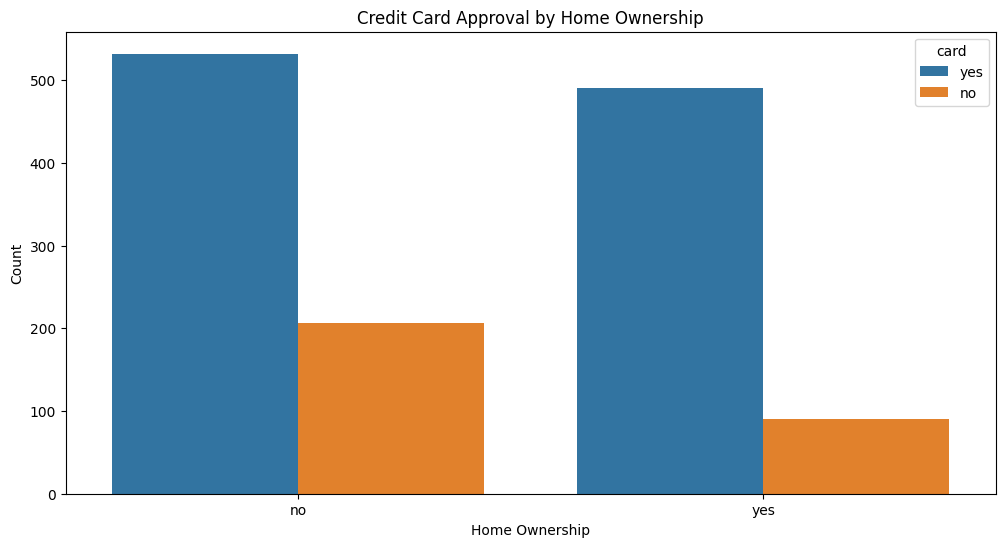

In [14]:
# Convert 'card', 'owner', and 'selfemp' to categorical types
creditcard_data['card']    = creditcard_data['card'].astype('str')
creditcard_data['owner']   = creditcard_data['owner'].astype('category')
creditcard_data['selfemp'] = creditcard_data['selfemp'].astype('category')

# Card vs Owner
plt.figure(figsize = (12, 6))

sns.countplot(x    = 'owner', 
              hue  = 'card', 
              data = creditcard_data)

plt.title('Credit Card Approval by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.show()


### Bivariate Analysis Insights Card vs Owner:
================================================

- Homeownership has a clear effect on credit card approval. A higher proportion of homeowners are approved compared to non-homeowners, which suggests homeownership could be a positive factor in the approval process.

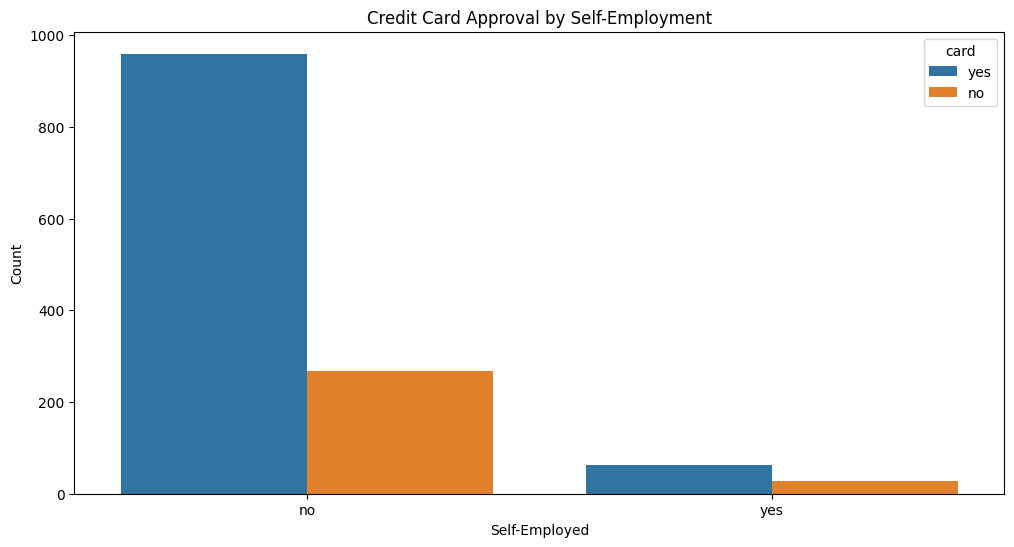

In [15]:
# Card vs Self-Employed
plt.figure(figsize = (12, 6))

sns.countplot(x    = 'selfemp', 
              hue  = 'card', 
              data = creditcard_data)

plt.title('Credit Card Approval by Self-Employment')
plt.xlabel('Self-Employed')
plt.ylabel('Count')
plt.show()


### Bivariate Analysis InsightsCard vs Owner:
================================================

- The analysis shows a slight difference between self-employed and non-self-employed individuals, where self-employed applicants seem to have a marginally lower approval rate. This might suggest that banks are more cautious when dealing with self-employed individuals.

### Numerical vs Response:

- Box plots or violin plots for numerical variables against the response (card) to see how the distributions of variables like age, income, and expenditure differ between approved and non-approved credit card applications.


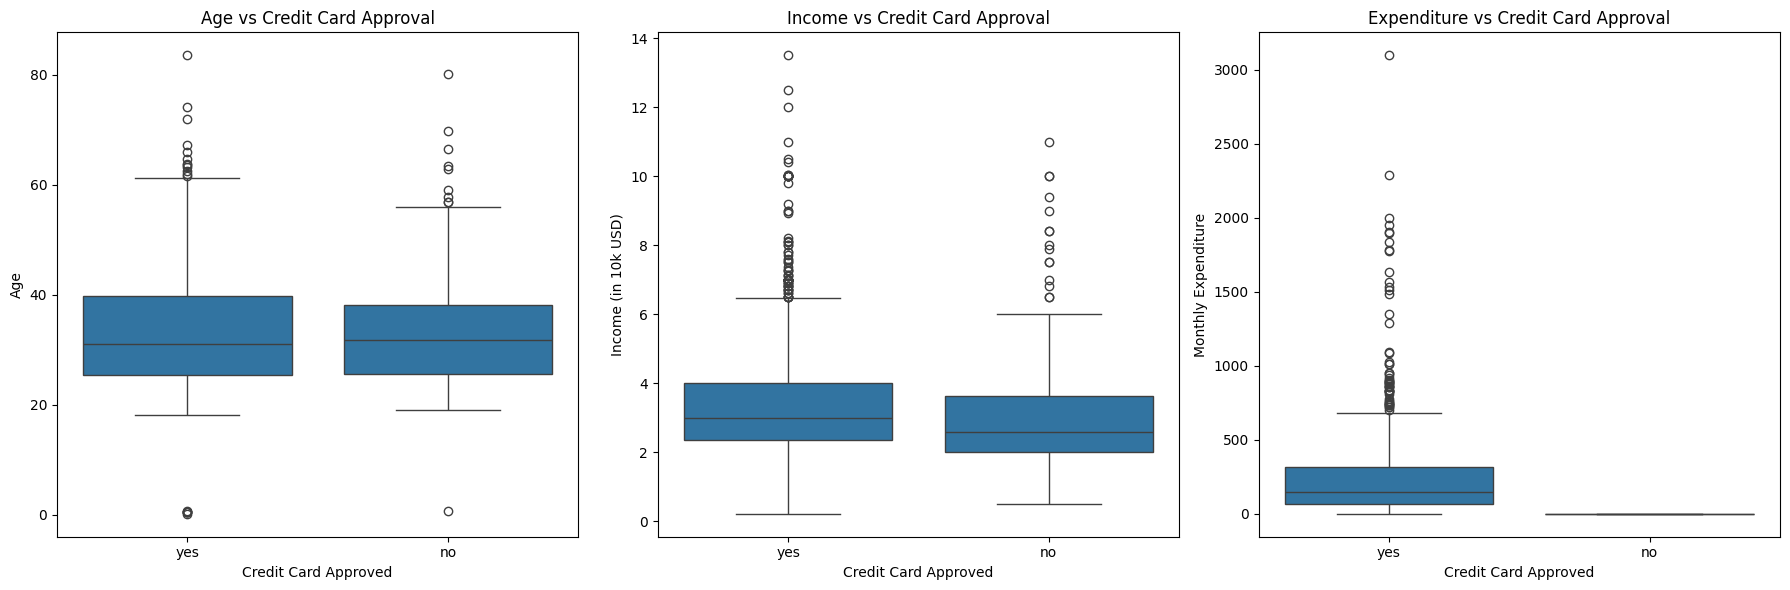

In [16]:
# Boxplot for Age, Income, and Expenditure vs Card
fig, axes = plt.subplots(nrows   = 1, 
                         ncols   = 3, 
                         figsize = (18, 6))

# Age vs Card
sns.boxplot(x    = 'card', 
            y    = 'age', 
            data = creditcard_data, 
            ax   = axes[0])

axes[0].set_title('Age vs Credit Card Approval')
axes[0].set_xlabel('Credit Card Approved')
axes[0].set_ylabel('Age')

# Income vs Card
sns.boxplot(x    = 'card', 
            y    = 'income', 
            data = creditcard_data, 
            ax   = axes[1])

axes[1].set_title('Income vs Credit Card Approval')
axes[1].set_xlabel('Credit Card Approved')
axes[1].set_ylabel('Income (in 10k USD)')

# Expenditure vs Card
sns.boxplot(x    = 'card', 
            y    = 'expenditure',
            data = creditcard_data, 
            ax   = axes[2])

axes[2].set_title('Expenditure vs Credit Card Approval')
axes[2].set_xlabel('Credit Card Approved')
axes[2].set_ylabel('Monthly Expenditure')

plt.tight_layout()
plt.show()


### Bivariate Numerical vs Response Boxplot Analysis Insights:
=================================================================

- Age vs Credit Card Approval: Older applicants seem to have a higher approval rate, as seen from the boxplot. This could indicate that applicants with more financial stability (as reflected in age) are more likely to be approved.

---------------

- Income vs Credit Card Approval: There is a noticeable difference in income between approved and not approved applications. Approved applicants generally have higher incomes, which is understandable given income's direct correlation with creditworthiness.

---------------

- Expenditure vs Credit Card Approval: Approved applicants tend to have higher expenditures, suggesting that those who spend more (and thus may have higher incomes or better credit histories) are more likely to be approved.

##### Scatter plots of age, income, and share against expenditure or active to investigate any correlations with credit card approval.

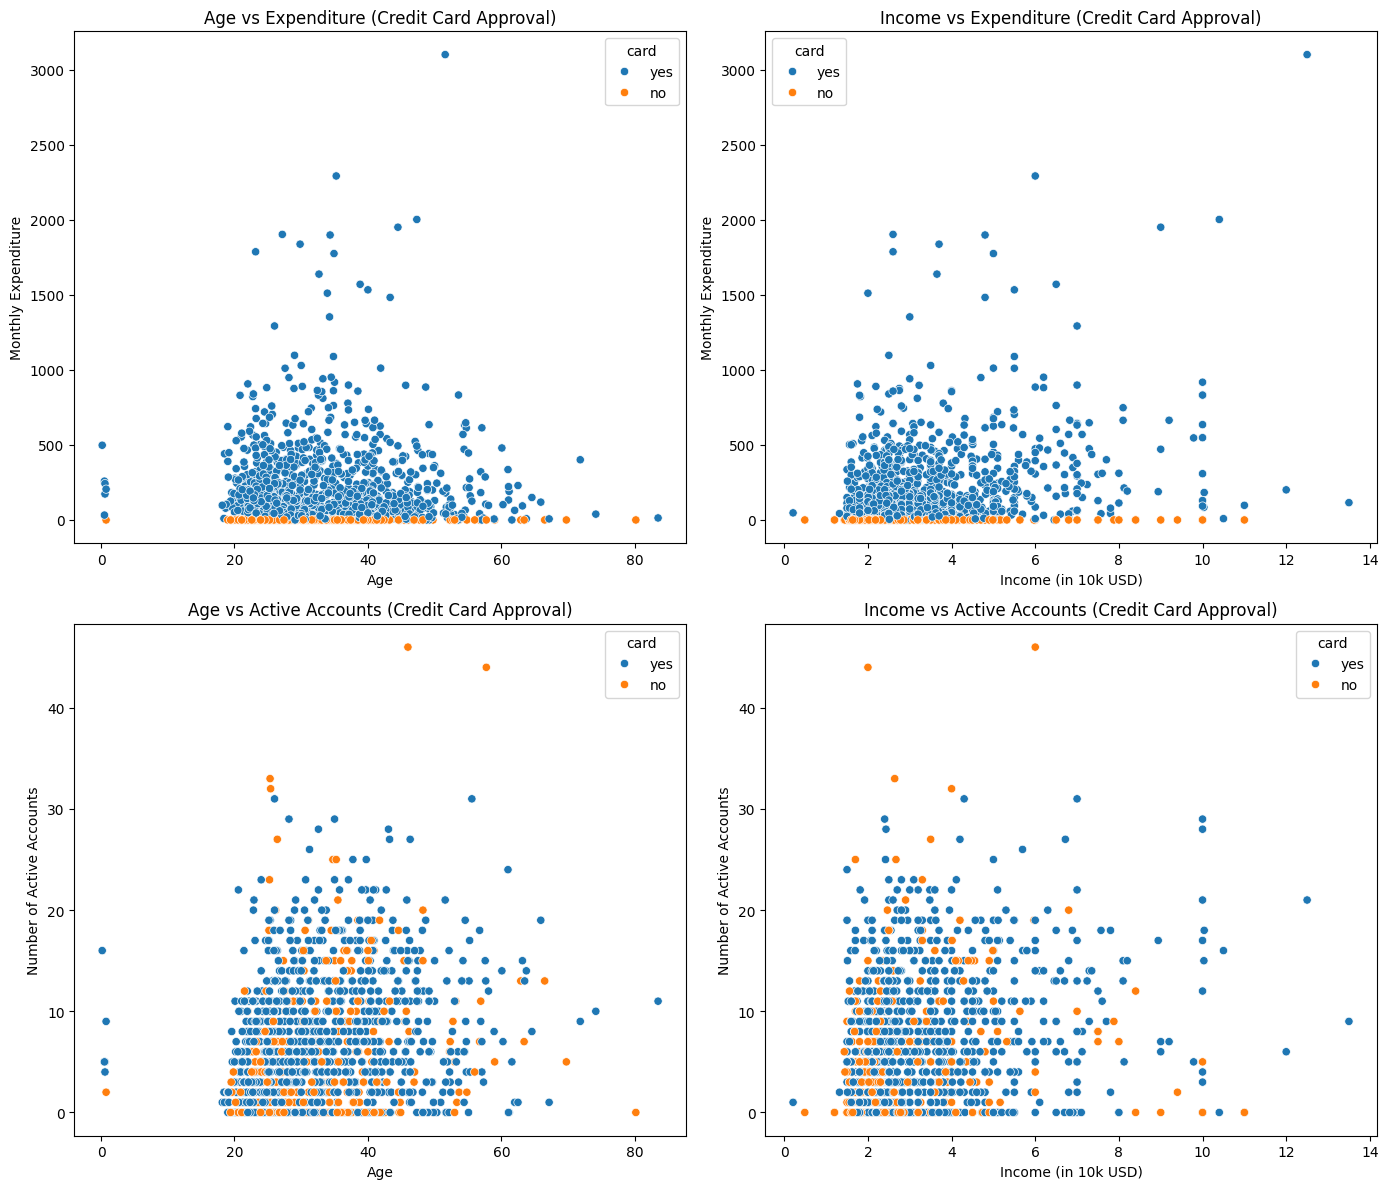

In [17]:
# Scatter plots for Age, Income, and Share against Expenditure/Active
fig, axes = plt.subplots(nrows   = 2, 
                         ncols   = 2, 
                         figsize = (14, 12))

# Age vs Expenditure
sns.scatterplot(x    = 'age', 
                y    = 'expenditure', 
                hue  = 'card', 
                data = creditcard_data, 
                ax   = axes[0, 0])

axes[0, 0].set_title('Age vs Expenditure (Credit Card Approval)')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Monthly Expenditure')

# Income vs Expenditure
sns.scatterplot(x    ='income', 
                y    = 'expenditure', 
                hue  = 'card', 
                data = creditcard_data, 
                ax   = axes[0, 1])

axes[0, 1].set_title('Income vs Expenditure (Credit Card Approval)')
axes[0, 1].set_xlabel('Income (in 10k USD)')
axes[0, 1].set_ylabel('Monthly Expenditure')

# Age vs Active accounts
sns.scatterplot(x    = 'age', 
                y    = 'active', 
                hue  = 'card', 
                data = creditcard_data, 
                ax   = axes[1, 0])

axes[1, 0].set_title('Age vs Active Accounts (Credit Card Approval)')
axes[1, 0].set_xlabel('Age')
axes[1, 0].set_ylabel('Number of Active Accounts')

# Income vs Active accounts
sns.scatterplot(x    = 'income', 
                y    = 'active', 
                hue  = 'card', 
                data = creditcard_data, 
                ax   = axes[1, 1])

axes[1, 1].set_title('Income vs Active Accounts (Credit Card Approval)')
axes[1, 1].set_xlabel('Income (in 10k USD)')
axes[1, 1].set_ylabel('Number of Active Accounts')

plt.tight_layout()
plt.show()


### Scatter Plots Insights:
---------------------------
- Age vs Expenditure (colored by Credit Card Approval):

1) The scatter plot reveals a trend where older applicants (particularly those over 40 years of age) generally have higher credit card expenditures.

2) Applicants with higher expenditure (across all ages) tend to have a greater likelihood of credit card approval. 

3) For younger applicants (below 40), expenditure is mostly lower, but there are some who spend more and have been approved. The outliers among younger people with high expenditures are also approved more often. 

4) This suggests that age and expenditure together are strong factors influencing credit card approval.

----------------------

- Income vs Expenditure (colored by Credit Card Approval):

1) A clear positive correlation exists between income and expenditure—higher income individuals tend to spend more.

2) The scatter plot shows that applicants with higher income are more likely to be approved for credit cards, as seen by the cluster of approvals for high-income, high-expenditure individuals.

3) Those with lower income and lower expenditure are less likely to be approved, implying that spending behavior in relation to income is a critical factor in credit card approval.

-------------------------

- Age vs Active Accounts (colored by Credit Card Approval):

1) The number of active accounts increases with age, and older applicants (above 40) tend to have more active accounts.

2) Applicants with more active accounts are generally more likely to be approved for credit cards, as shown by the higher density of approvals in the higher active account range.

3) However, younger individuals with fewer active accounts still receive approvals, indicating that age might not be as crucial as active account history.

--------------------------

- Income vs Active Accounts (colored by Credit Card Approval):

1) This scatter plot shows that those with higher incomes tend to have more active accounts.

2) Approval is concentrated among those with more active accounts, though there are some lower-income individuals with a high number of active accounts who also get approved. This could suggest that active account management is a strong indicator of creditworthiness, even when income is not very high.

3) Those with few active accounts and low income are less likely to be approved, indicating the bank might use both factors in their approval decision.

---------------------------------

### General Insights Across All Scatter Plots:
-----------------------------------------------

- Expenditure is a key factor across all relationships. Higher expenditure correlates with a higher likelihood of approval, whether linked with age or income.

- Income and active accounts together also seem to have an important influence. Applicants with higher income and more active accounts are generally seen as safer bets for the bank.

- Age on its own shows some influence, but its effect is more pronounced when combined with expenditure or active accounts.

### Correlation Matrix:

- Heatmap of correlations between numerical variables (reports, age, income, etc.) and the binary response (cardN) to explore pairwise relationships.

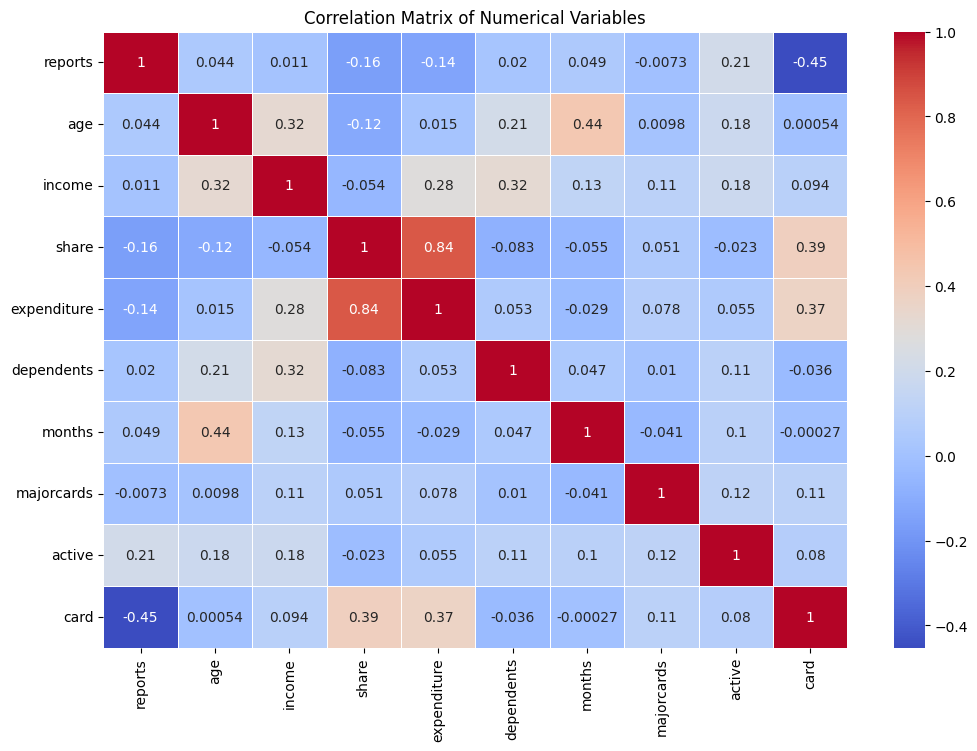

In [18]:
# Correlation heatmap between numerical variables and 'card'
heatmap_data         = creditcard_data.copy()

heatmap_data['card'] = heatmap_data['card'].map({'yes': 1, 'no': 0})
corr_matrix          = heatmap_data[['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active', 'card']].corr()

plt.figure(figsize = (12, 8))

sns.heatmap(data       = corr_matrix, 
            annot      = True, 
            cmap       ='coolwarm', 
            linewidths = 0.5)

plt.title('Correlation Matrix of Numerical Variables')
plt.show()


### Bivariate Correlation Analysis Insights:
--------------------------------------------

- There is a moderate positive correlation between expenditure and income, and a slight positive correlation between age and months at current address. However, none of the variables show very strong correlations with the credit card approval variable directly, indicating that multiple factors together may influence the approval decision.


### For Categorical vs Categorical Variables:

- Contingency Table: Used to represent the frequencies for two categorical variables.

In [19]:
contingency_table = pd.crosstab(creditcard_data['owner'], creditcard_data['card'])
contingency_table

card,no,yes
owner,,
no,206,532
yes,90,491


### Chi-Square Test: To check if there’s a significant association between two categorical variables.

In [20]:
# Chi-Square Test for association between 'owner' and 'card' (credit card approval)

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Test: {chi2_stat}, p-value: {p_val}")


Chi-Square Test: 28.11407333689662, p-value: 1.1437115047558142e-07


1. Chi-Square Statistic (28.11): This value measures the discrepancy between the observed and expected frequencies in the contingency table. A higher value indicates a stronger association between the two variables (in this case, owner and card).


2. p-value (1.14e-07): This is the probability that the observed association (or something more extreme) occurred by chance, under the assumption that the two variables are independent (null hypothesis).

- Since the p-value (1.14e-07) is extremely small and much less than the conventional threshold (e.g., 0.05), we reject the null hypothesis.

- This means that there is a statistically significant association between home ownership (owner) and credit card approval (card). In other words, whether an individual owns a home has a significant impact on whether their credit card application gets approved or not.


### For Numerical vs Categorical Variables

- T-test: Used to compare the means of two groups (e.g., credit card approval vs income).

In [21]:
# T-test for 'income' based on 'card' approval
approved        = creditcard_data[creditcard_data['card'] == 'yes']['income']
not_approved    = creditcard_data[creditcard_data['card'] == 'no']['income']
t_stat, p_value = ttest_ind(approved, not_approved)

print(f"T-test Statistic: {t_stat}, p-value: {p_value}")


T-test Statistic: 3.4377883877255977, p-value: 0.0006047776915757775


- T-test Statistic: The T-test statistic of approximately 3.44 indicates the magnitude of difference between the means of the two groups (approved vs. not approved for the credit card) relative to the variability in the data. A higher absolute value suggests a greater difference between the two groups.

- P-value: The p-value of approximately 0.0006.

- If we set a common significance level (α) of 0.05, the null hypothesis states that there is no difference in income between those whose credit card applications were approved and those whose were not.

- Since 0.0006 < 0.05, we conclude that there is a statistically significant difference in income between the two groups.

#### Mann-Whitney U Test: A non-parametric test 

- In our case, we're comparing the distributions of income between two groups: those whose credit card applications were approved and those whose applications were not approved.

- Null Hypothesis H0 : There is no difference in the income distributions between those approved and those not approved for a credit card.

- Alternative Hypothesis H1: There is a difference in the income distributions between the two groups.


In [22]:
# Perform the Mann-Whitney U Test
u_statistic, p_value = mannwhitneyu(approved, not_approved, alternative='two-sided')

# Output the results
print(f"Mann-Whitney U Statistic: {u_statistic}, p-value: {p_value}")


Mann-Whitney U Statistic: 178320.5, p-value: 3.0946801553485256e-06


- The U statistic of 178320.5 provides a measure of the rank sums between the two groups. This value itself is primarily used for comparison rather than direct interpretation.

- P-value: The p-value of approximately 3.09e-06 (or 0.00000309) is extremely low. 

- Commonly, a significance level (α) of 0.05 is used. Since 0.00000309 < 0.05, we can reject the null hypothesis.

- The null hypothesis states that there is no difference in the distributions of income between those approved for a credit card and those not approved.

- The low p-value indicates strong evidence against the null hypothesis.

# Multivariate Analysis (Effect of multiple variables)

### Pairplot:
- A pairplot of the numerical variables colored by the response (card) to visualize pairwise relationships.

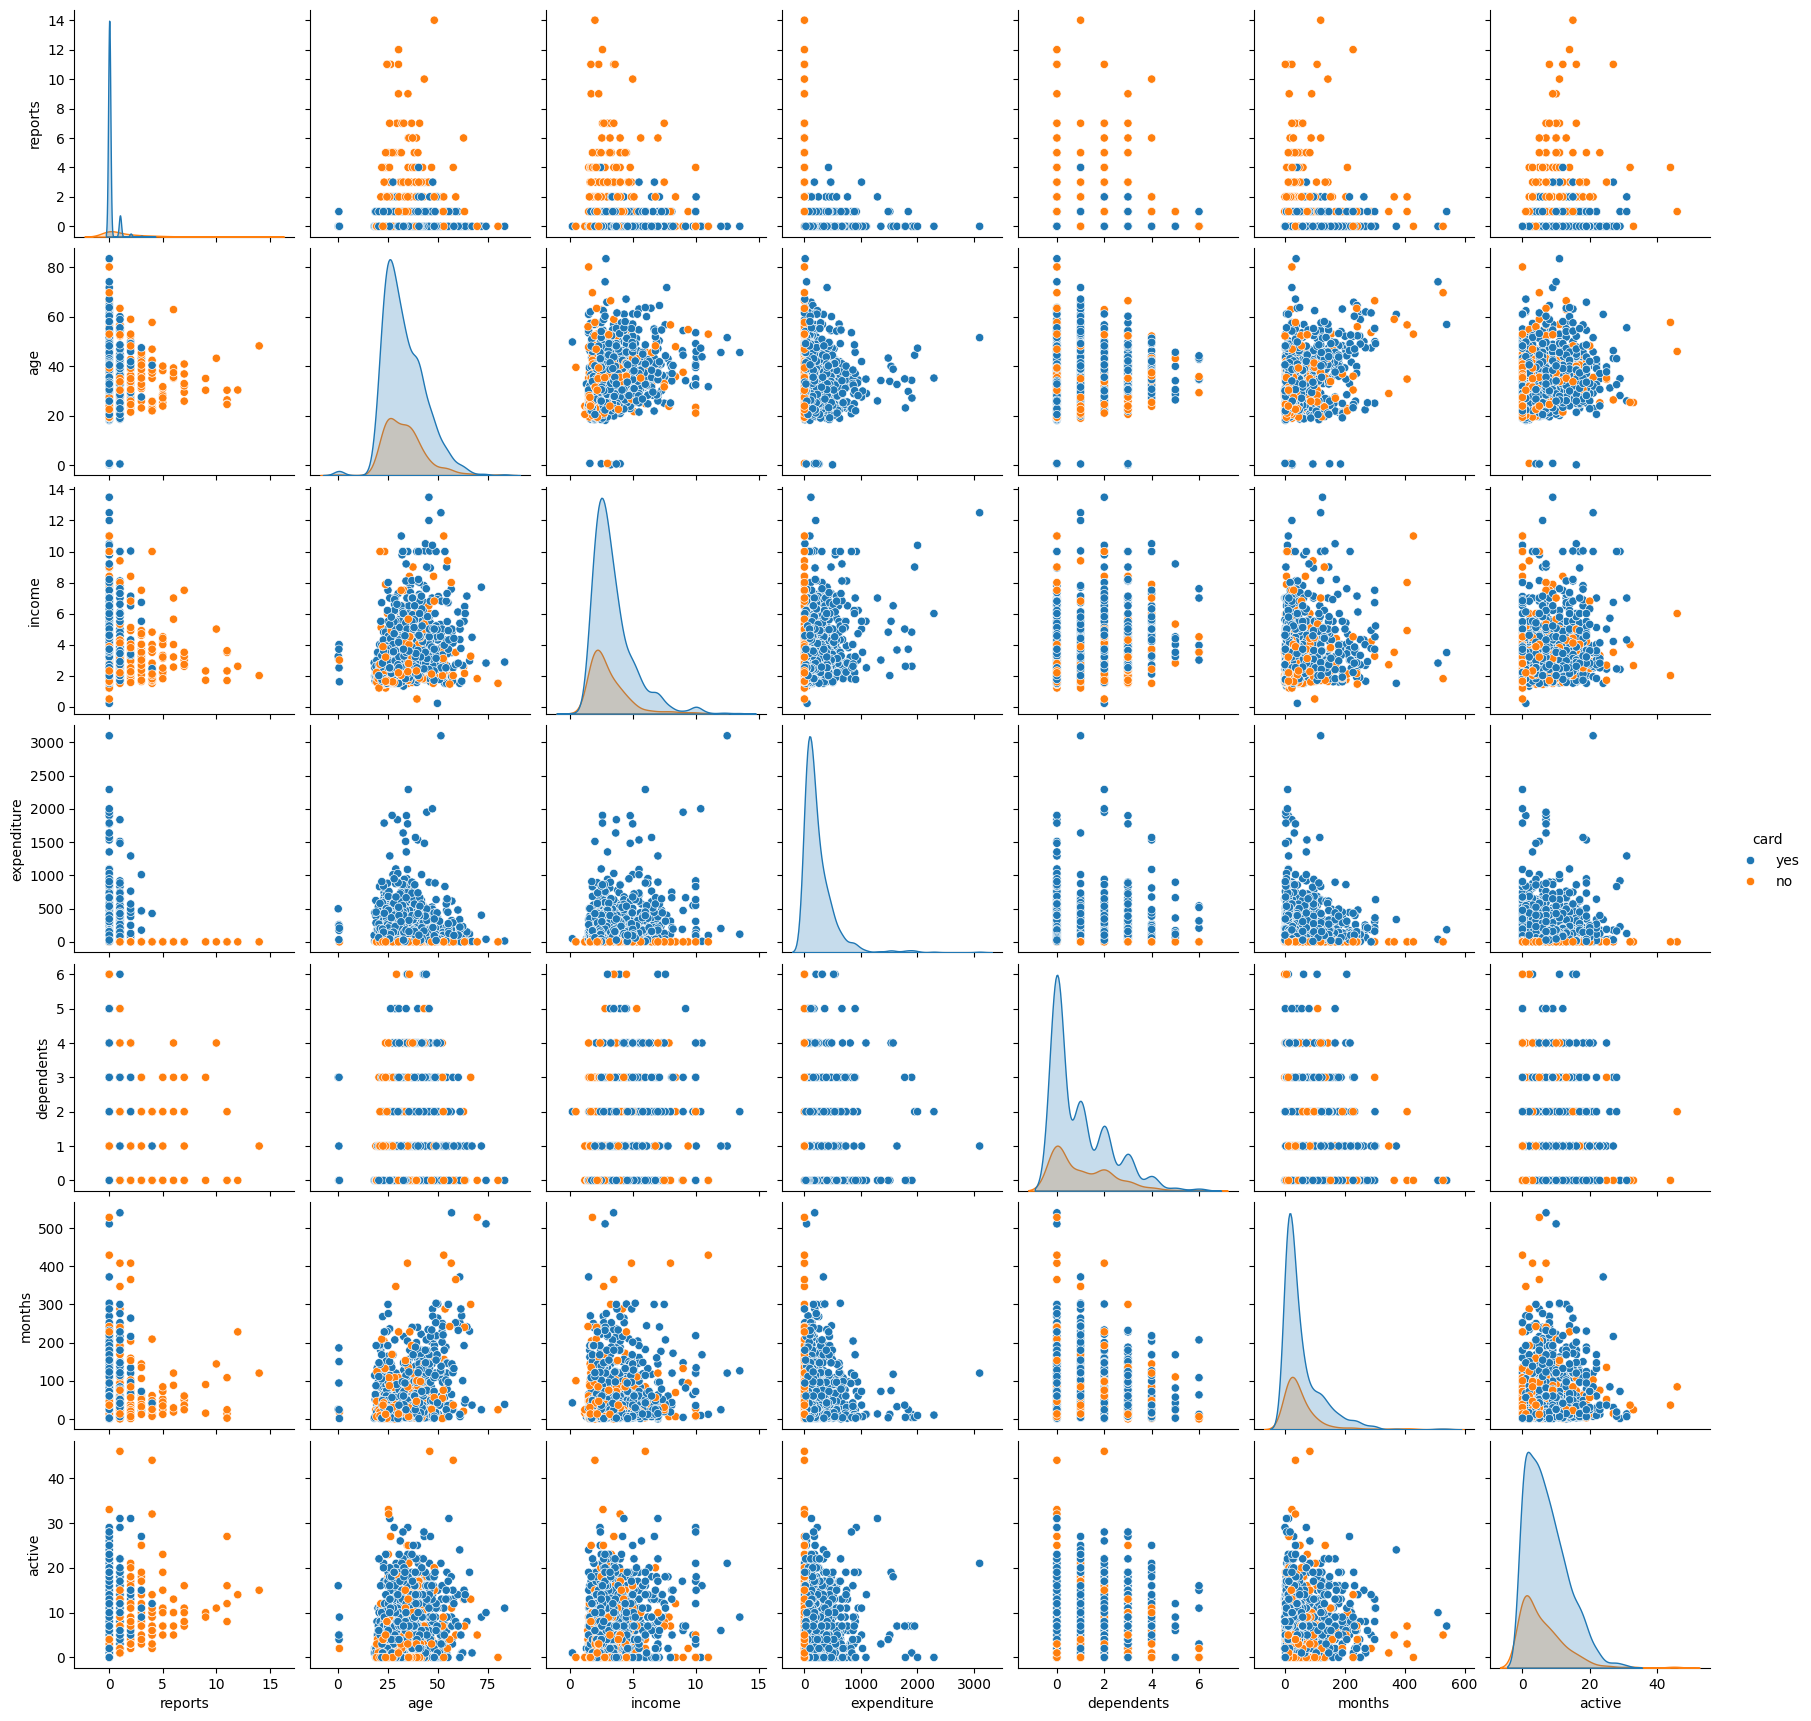

In [23]:
# Pairplot of numerical variables colored by 'card'
pairplot_data         = creditcard_data.copy()
pairplot_data['card'] = pairplot_data['card'].astype(str)

sns.pairplot(pairplot_data[['reports', 'age', 'income', 'expenditure', 'dependents', 'months', 'active', 'card']], hue='card')
plt.show()


### Pairplot Insights:
----------------------

- The pairplot provides a visual comparison of pairwise relationships between variables like age, income, expenditure, dependents, and months. While individual variables might not show strong separations, when combined, they offer insights into trends, particularly regarding expenditure and income.

### Logistic Regression/Feature Importance:
- Fit a logistic regression model to determine the most important features that affect credit card approval.

In [24]:
# Prepare data for Logistic Regression
X = creditcard_data[['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']]
y = creditcard_data['card']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Predict and evaluate
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          no       0.91      1.00      0.95        62
         yes       1.00      0.97      0.98       202

    accuracy                           0.98       264
   macro avg       0.96      0.99      0.97       264
weighted avg       0.98      0.98      0.98       264



### Classification Report Overview:
------------------------------------

The classification report includes key metrics for assessing the model's performance on predicting the credit card approval (binary classification problem). These metrics are provided for each class (in this case, "no" for non-approval and "yes" for approval) and include:

1) Precision: The ratio of correctly predicted positive observations (e.g., approvals) to the total predicted positive observations.

2) Recall (Sensitivity or True Positive Rate): The ratio of correctly predicted positive observations to all actual positive observations.

3) F1-Score: The harmonic mean of precision and recall, providing a single metric that balances both precision and recall.

4) Support: The actual number of occurrences of each class in the dataset.

----------------------------------

1) Class "no" (Credit Card Not Approved):

- Precision (0.91):

- Definition: Out of all the applicants predicted to be not approved (i.e., predicted as "no"), 91% were actually not approved.

- Interpretation: This is a good result, indicating that the model is relatively accurate in predicting when an applicant will not be approved, although there is some room for improvement (9% of applicants predicted as "no" were actually approved).

- Recall (1.00):

- Definition: Out of all the applicants who were actually not approved, the model correctly identified 100% of them.

- Interpretation: The model is excellent at capturing all true negatives (those whose credit card applications were not approved).

- F1-Score (0.95):

- Definition: The harmonic mean of precision and recall, indicating a balance between both metrics. A score of 0.95 is very high, reflecting that the model performs well at both correctly predicting non-approvals and avoiding false positives.
---------------------------

2) Class "yes" (Credit Card Approved):

- Precision (1.00):

- Definition: Out of all the applicants predicted to be approved (i.e., predicted as "yes"), 100% were actually approved.

- Interpretation: The model is perfect in terms of precision for predicting approvals, meaning it never incorrectly predicts an applicant as approved when they were not approved.


- Recall (0.97):

- Definition: Out of all the applicants who were actually approved, the model correctly identified 97% of them.

- Interpretation: While precision is perfect, recall is slightly less than 1.0, meaning that the model missed 3% of the actual approvals (i.e., 3% of people who should have been approved were predicted as not approved).

------------------

- F1-Score (0.98):

- Definition: This is the harmonic mean of precision and recall for the approval class. The score of 0.98 indicates that the model performs extremely well in predicting approvals, although it could still be slightly improved in terms of recall.

------------------

3) Accuracy (0.98):

- Definition: Accuracy is the proportion of correctly predicted observations (both "yes" and "no") out of all observations.

- Interpretation: The model correctly classified 98% of the total 264 observations. This indicates an overall high performance, although accuracy alone can sometimes be misleading when dealing with imbalanced datasets.

------------------

4. Macro Average (Precision = 0.96, Recall = 0.99, F1-Score = 0.97):

- Definition: Macro average is the unweighted mean of precision, recall, and F1-score across both classes ("no" and "yes"). Each class is treated equally, regardless of its support (number of instances).

- Interpretation: The macro average indicates that the model performs very well across both classes. With high precision and recall values, the model balances between identifying approved and non-approved applicants effectively, without focusing too much on the dominant class ("yes").

-----------------------

5. Weighted Average (Precision = 0.98, Recall = 0.98, F1-Score = 0.98):

- Definition: The weighted average takes into account the support (number of instances) for each class when calculating the mean for precision, recall, and F1-score. This is useful when there is class imbalance.

- Interpretation: The weighted average is very close to the accuracy value. Since the majority of applicants are approved (202 approvals vs. 62 non-approvals), this indicates that the model's performance is strongly influenced by the larger class (approved), but still manages to perform well across both categories.

---------------

### Final Insights:
====================

- High Precision and Recall for Approved (Yes):

1) The model is excellent at predicting credit card approvals, with perfect precision and very high recall. This means it almost never incorrectly predicts an approval (very low false positives) and rarely misses actual approvals.

2) Slightly Lower Precision for Not Approved (No):

3) The precision for predicting non-approval is slightly lower at 0.91, meaning the model sometimes incorrectly predicts that an applicant will not be approved when they actually are.


- Class Imbalance:

1) There is a class imbalance (202 "yes" vs. 62 "no"). The model handles this imbalance well, but the macro average values are slightly lower than the weighted averages, which shows the difference in performance between the two classes.

- Overall Model Performance:

- With an accuracy of 98%, the model is highly effective, especially in its ability to predict approvals. However, it could benefit from minor adjustments to improve its recall for non-approvals, potentially reducing false negatives.

#### Investigate the feature importance to understand the collective influence of variables.

In [25]:
# Feature importance (coefficients)
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': log_reg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).T
feature_importance


,4,7,8,1,3,6,2,5,0
Feature,expenditure,majorcards,active,age,share,months,income,dependents,reports
Importance,1.692503,0.142767,0.058267,0.039309,-0.000876,-0.004616,-0.021758,-0.661596,-1.259814


### 1) Expenditure Insights:

- High Positive Coefficient: Expenditure has the highest positive coefficient among the predictors. This means that for each additional unit of expenditure (i.e., increase in average monthly credit card expenditure), the odds of credit card approval significantly increase.

- Practical Interpretation: The bank is more likely to approve applicants who already spend more on their existing credit cards. This suggests that applicants who have established spending patterns, especially higher ones, are seen as reliable customers with a proven track record of utilizing credit.
-----------------

### 2) Majorcards:

- Positive Coefficient: The number of major credit cards held by the applicant also positively affects the likelihood of approval, although to a smaller degree than expenditure.

- Practical Interpretation: Applicants who hold more major credit cards are likely seen as experienced credit users who can manage multiple credit products responsibly. This variable reflects the applicant’s ability to handle different lines of credit, which increases their approval chances.

- Caution: While this is a positive factor, having too many major cards might eventually become a concern due to over-leveraging (although this is not observed as a negative factor in this dataset).

------------------

### 3) Income:

- Moderate Negative Coefficient: Surprisingly, income has a slightly negative coefficient, indicating that higher income is not strongly associated with an increase in the odds of credit card approval in this model.

- Practical Interpretation: Although higher-income applicants tend to spend more, income alone might not be as influential as expenditure. This could be because applicants with higher income but lower expenditure may be less appealing to banks, who prefer customers that actively utilize credit.

- Potential Explanation: The model likely places more weight on spending behavior (expenditure) rather than the income level itself, as expenditure directly impacts how profitable a customer is to the bank.

----------------

### 4) Dependents:

- Negative Coefficient: The presence of dependents has a negative impact on credit card approval, meaning that for each additional dependent, the odds of approval decrease.

- Practical Interpretation: This might suggest that applicants with many dependents are perceived as having higher financial responsibilities or liabilities, which may reduce their likelihood of managing additional credit effectively. Banks may see this as a risk factor since more dependents could mean greater household expenses and a higher likelihood of financial stress.

----------------

### 5) Reports:

- Strong Negative Coefficient: The number of derogatory reports (e.g., late payments, defaults) has the strongest negative influence on credit card approval. Each additional derogatory report significantly decreases the odds of approval.

- Practical Interpretation: This is intuitive since derogatory reports are clear indicators of poor credit behavior. Banks are highly likely to reject applications from individuals with multiple derogatory reports, as they represent a higher default risk. The more derogatory reports an applicant has, the less likely the bank is to trust them with additional credit.

-------------------

### Interpretation of Model Results:
-------------------------------------

- The logistic regression model estimates the log odds of credit card approval based on the provided features. For each feature, the model assigns a coefficient, which quantifies the change in log odds of approval per unit increase in that feature. Positive coefficients increase the likelihood of approval, while negative coefficients decrease it.

- Feature Importance: In this case, expenditure is the most critical feature, indicating that how much an applicant spends is a more decisive factor than their income or number of dependents.

- Collective Influence: The combination of expenditure and majorcards showcases that an applicant's financial behavior (expenditure) and credit experience (majorcards) are what the model finds most valuable in predicting approval. Income, while still important, seems to be less directly indicative of approval than how that income is utilized.


### Principal Component Analysis (PCA):

- Perform PCA on the numerical variables to see if the data can be reduced to a few components while retaining significant variance.


In [26]:
# Standardize the data before PCA
scaler   = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca      = PCA(n_components = 9)
X_pca    = pca.fit_transform(X_scaled)



In [27]:
# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data    = X_pca, 
                      columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])

# Adding the target variable for visualization
pca_df['card'] = creditcard_data['card']

# Print explained variance ratio to understand how much variance is captured by each component
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.21482628 0.2125059  0.12799833 0.11816634 0.10579771 0.08035577
 0.07318585 0.05638991 0.01077391]


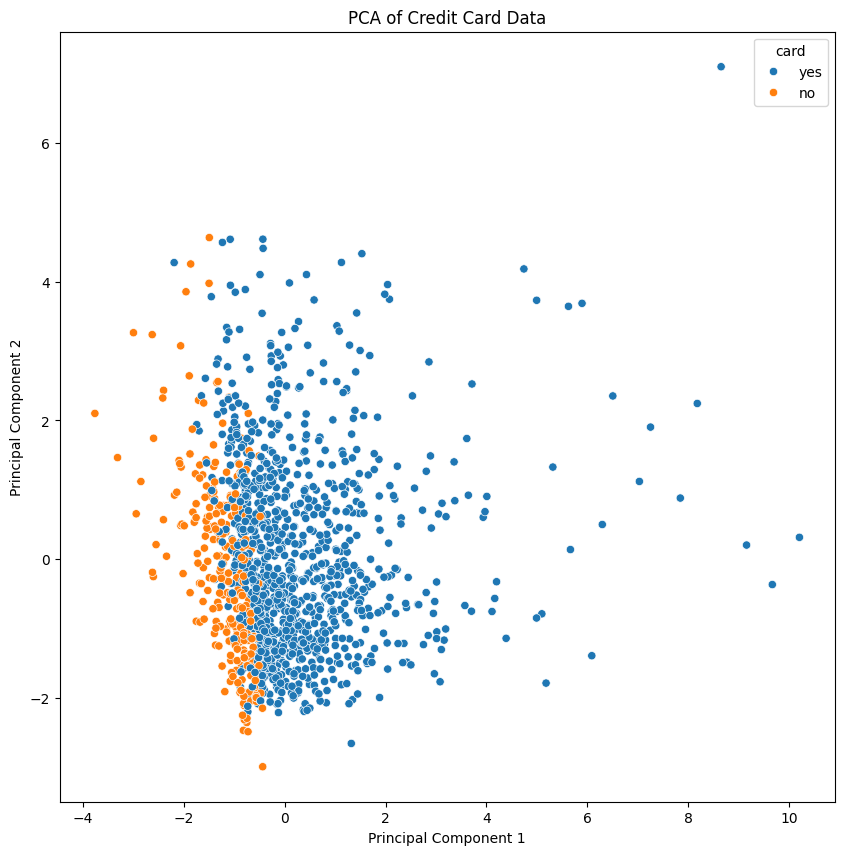

In [28]:
# Plot PCA
plt.figure(figsize=(10, 10))

sns.scatterplot(x   = X_pca[:, 0], 
                y   = X_pca[:, 1], 
                hue = y)

plt.title('PCA of Credit Card Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
#plt.show()
plt.savefig("../assets/pca_scatter.jpg")

### PCA Insights:
------------------

- The PCA captures significant variance across multiple principal components, with the first two components explaining around 42.7% of the variance. This implies that the dataset has several dimensions, and a simple linear combination of variables might not fully capture the complexity of credit card approval decisions.

### Cluster Analysis: 

- Let's Perform k-means clustering on the numerical data to identify customer segments that may have distinct credit approval patterns. This could help the bank in targeting specific customer profiles more effectively.

Optimal number of clusters based on silhouette score: 6


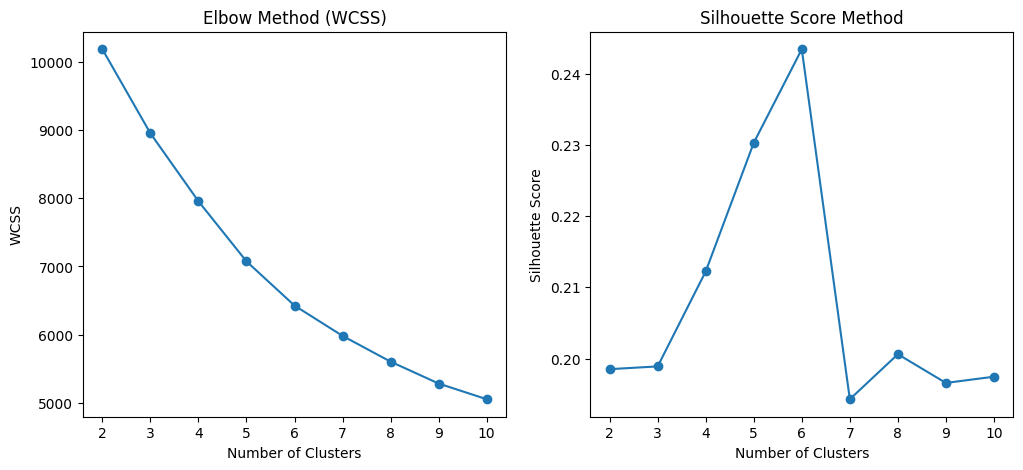

In [29]:
# Select numerical features for clustering
numerical_features = ['reports', 'age', 'income', 'share', 'expenditure', 'dependents', 'months', 'majorcards', 'active']

# Standardize the data
scaler             = StandardScaler()
data_scaled        = scaler.fit_transform(creditcard_data[numerical_features])

# Function to calculate the optimal number of clusters
def find_optimal_clusters(data_scaled):
    wcss              = []  # For the Elbow Method
    silhouette_scores = []  # For the Silhouette Method
    
    # Range of clusters to evaluate
    max_clusters      = 10
    cluster_range     = range(2, max_clusters + 1)
    
    for k in cluster_range:
        kmeans = KMeans(n_clusters   = k, 
                        init         = 'k-means++', 
                        max_iter     = 300, 
                        n_init       = 10, 
                        random_state = 42)
        
        kmeans.fit(data_scaled)
        
        # Elbow Method: Append the WCSS for each k
        wcss.append(kmeans.inertia_)
        
        # Silhouette Score: Calculate silhouette score for each k
        labels         = kmeans.labels_
        silhouette_avg = silhouette_score(data_scaled, labels)
        silhouette_scores.append(silhouette_avg)
    
    # Plot Elbow Method
    plt.figure(figsize = (12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(cluster_range, wcss, marker='o')
    plt.title('Elbow Method (WCSS)')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WCSS')
    
    # Plot Silhouette Score
    plt.subplot(1, 2, 2)
    plt.plot(cluster_range, silhouette_scores, marker='o')
    plt.title('Silhouette Score Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouette Score')
    #plt.show()
    plt.savefig("../assets/clustering_evaluation.jpg")
    # Determine the optimal number of clusters based on silhouette score
    optimal_k_silhouette = cluster_range[np.argmax(silhouette_scores)]
    
    print(f"Optimal number of clusters based on silhouette score: {optimal_k_silhouette}")
    return optimal_k_silhouette

# Find the optimal number of clusters
optimal_clusters = find_optimal_clusters(data_scaled)



In [30]:
# Let's fit number of optimal clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
kmeans.fit(data_scaled)

# Add the cluster labels to the original data
creditcard_data['Cluster'] = kmeans.labels_

In [31]:
creditcard_data

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active,age_group,income_group,Cluster
1,yes,0,37.66667,4.5200,0.033270,124.983300,yes,no,3,54,1,12,30-40,Very High Income,5
2,yes,0,33.25000,2.4200,0.005217,9.854167,no,no,3,34,1,13,30-40,Mid Income,5
3,yes,0,33.66667,4.5000,0.004156,15.000000,yes,no,4,58,1,5,30-40,Very High Income,5
4,yes,0,30.50000,2.5400,0.065214,137.869200,no,no,0,25,1,7,30-40,Mid Income,1
5,yes,0,32.16667,9.7867,0.067051,546.503300,yes,no,2,64,1,5,30-40,Very High Income,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1315,yes,0,33.58333,4.5660,0.002146,7.333333,yes,no,0,94,1,19,30-40,Very High Income,1
1316,no,5,23.91667,3.1920,0.000376,0.000000,no,no,3,12,1,5,20-30,High Income,2
1317,yes,0,40.58333,4.6000,0.026513,101.298300,yes,no,2,1,1,2,40-50,Very High Income,5
1318,yes,0,32.83333,3.7000,0.008999,26.996670,no,yes,0,60,1,7,30-40,High Income,1


In [33]:
# Analyze the mean values of each cluster
creditcard_data['card'] = creditcard_data['card'].map({'yes': 1, 'no': 0})
cluster_summary         = creditcard_data.groupby('Cluster')[numerical_features + ['card']].mean()
cluster_summary


,reports,age,income,share,expenditure,dependents,months,majorcards,active,card
Cluster,,,,,,,,,,
0,0.240602,48.477444,3.691659,0.050494,144.288094,0.834586,187.390977,0.887218,8.323308,0.857143
1,0.168810,29.093649,2.750369,0.056138,125.287699,0.535370,33.326367,1.000000,6.032154,0.805466
2,5.261538,34.943590,3.196028,0.006393,13.686129,1.046154,50.984615,0.846154,12.107692,0.030769
3,0.256410,30.598291,2.706155,0.050976,112.392802,0.784615,48.102564,0.000000,4.487179,0.697436
4,0.192771,29.910643,3.486892,0.332683,900.560780,0.795181,42.602410,0.903614,6.445783,1.000000
5,0.257919,38.659502,5.485778,0.050027,223.612088,2.624434,49.846154,0.941176,9.832579,0.846154


### Cluster-wise Insights:
---------------------------

1) Cluster 0:

- Reports (0.25): Very low derogatory reports, suggesting good credit behavior.
- Age (38.47): Middle-aged individuals.
- Income (5.42): Higher income compared to most other clusters.
- Expenditure (221.47): Moderate expenditure, reflecting active usage but not extremely high.
- Dependents (2.62): Higher number of dependents.
- Months (49.61): Stable residency, reflecting stability.
- Majorcards (0.94): Nearly 1 major credit card on average.
- Active accounts (9.92): High number of active accounts.

- Insight: This cluster appears to represent middle-aged, higher-income individuals with a stable financial profile and moderate credit usage. Given the low derogatory reports and higher income, these individuals are likely to be good candidates for credit card approvals. Their relatively high number of active accounts and moderate expenditure indicate responsible financial behavior.

---------------------

2) Cluster 1:

- Reports (0.24): Low derogatory reports.
- Age (48.48): Older individuals.
- Income (3.69): Mid-level income.
- Expenditure (144.29): Moderate expenditure.
- Dependents (0.83): Fewer dependents.
- Months (187.39): Very high stability, as reflected by the months lived at their current residence.
- Majorcards (0.89): Nearly 1 major card.
- Active accounts (8.32): High number of active accounts.

- Insight: This cluster likely represents older, mid-income individuals who have high financial stability and low derogatory reports. Their long residency and moderate expenditure suggest that they are financially stable but perhaps more conservative in their spending. They are likely to have a good credit profile for credit card approvals, particularly because of their age, stability, and responsible financial behavior.

---------------------

3) Cluster 2:

- Reports (5.26): Very high derogatory reports.
- Age (34.94): Middle-aged.
- Income (3.19): Mid to lower income.
- Expenditure (13.69): Extremely low expenditure.
- Dependents (1.05): A moderate number of dependents.
- Months (50.98): Moderate stability.
- Majorcards (0.85): Fewer major credit cards.
- Active accounts (12.11): High number of active accounts.

- Insight: This cluster seems to represent a high-risk group, as evidenced by their very high number of derogatory reports. Despite having a moderate number of active accounts and mid-level income, their extremely low expenditure and high derogatory reports suggest that they are either financially overextended or are recovering from past credit issues. This group is likely to be rejected for credit card approval, as their high reports indicate poor credit behavior.

-------------

4) Cluster 3:

- Reports (0.17): Very low derogatory reports.
- Age (29.09): Younger individuals.
- Income (2.75): Lower income.
- Expenditure (125.28): Moderate expenditure.
- Dependents (0.52): Few dependents.
- Months (33.27): Shorter residency, indicating some instability.
- Majorcards (1.00): Likely to have 1 major credit card.
- Active accounts (5.97): Moderate number of active accounts.

- Insight: This cluster represents younger individuals with lower income, fewer dependents, and moderate credit activity. They have low derogatory reports, indicating responsible credit behavior, but their low income and shorter residency may make them slightly riskier candidates for credit card approval. They likely represent emerging or less established credit users, but their spending patterns and credit usage could improve over time.

-------------

5) Cluster 4:

- Reports (0.26): Low derogatory reports.
- Age (30.60): Young individuals.
- Income (2.71): Lower income.
- Expenditure (112.39): Moderate expenditure.
- Dependents (0.78): Few dependents.
- Months (48.10): Moderate stability in residency.
- Majorcards (0.00): No major credit cards.
- Active accounts (4.49): Fewer active accounts.

- Insight: This group likely consists of younger, low-income individuals with moderate expenditure but no major credit cards and fewer active accounts. Despite low derogatory reports, they may face challenges in credit card approval due to their lack of credit history and low financial engagement. They might be considered for entry-level or secured credit cards.

-------------

6) Cluster 5:

- Reports (0.19): Low derogatory reports.
- Age (29.91): Younger individuals.
- Income (3.49): Moderate income.
- Expenditure (900.56): Very high expenditure.
- Dependents (0.79): Few dependents.
- Months (42.60): Moderate stability.
- Majorcards (0.90): Almost 1 major credit card.
- Active accounts (6.45): Moderate number of active accounts.
- Insight: This cluster likely represents younger individuals with high expenditures relative to their income. Despite having low derogatory reports, their extremely high expenditure could indicate risky financial behavior or heavy usage of credit. They are moderate-income earners, but their spending might raise concerns for credit card issuers. These individuals could be prime candidates for credit cards, but their high expenditure might indicate a potential for overextension.

---------------

### General Observations:
=============================
1) Stable and High-Income Clusters (Clusters 0 and 1):

- These clusters, particularly Cluster 0 (higher income) and Cluster 1 (older, mid-income), are likely to be prime candidates for credit card approvals due to their financial stability, responsible credit behavior, and moderate to high credit usage.


2) High-Risk Cluster (Cluster 2):

- Cluster 2 represents a high-risk group with very high derogatory reports, low expenditure, and mid-level income. This group is likely to be rejected for credit card approval, and they may be flagged for additional scrutiny.

3) Younger, Low-Income Clusters (Clusters 3, 4, and 5):

- These clusters consist of younger individuals with low to moderate incomes, varying levels of credit usage, and a mix of stability. While Cluster 3 and Cluster 4 might be considered emerging or lower-risk applicants, Cluster 5, despite being younger, shows very high expenditures that could indicate credit overextension.

--------------

### Business Insights for the Bank:
====================================

- Targeting Lower-Risk Groups: Clusters 0 and 1 could be prioritized for premium credit card offers as they are financially stable, with responsible credit usage.

- Monitoring High-Risk Groups: Cluster 2 is a high-risk group, and the bank should be cautious when offering credit cards to these customers. Additional risk management processes could be applied here.

- Entry-Level Products for Young Groups: Clusters 3, 4, and 5 could be targeted with entry-level credit cards or secured credit cards to help them build credit responsibly, while keeping an eye on potentially high-risk spending behavior in Cluster 5.

In [34]:
# Check the distribution of credit card approval within each cluster
approval_distribution = creditcard_data.groupby('Cluster')['card'].value_counts(normalize=True)
approval_distribution

Cluster  card
0        1       0.857143
         0       0.142857
1        1       0.805466
         0       0.194534
2        0       0.969231
         1       0.030769
3        1       0.697436
         0       0.302564
4        1       1.000000
5        1       0.846154
         0       0.153846
Name: proportion, dtype: float64

### Cluster-wise Approval Distribution:
========================================

1) Cluster 0:

- Approval Rate (Yes): 84.96%
- Rejection Rate (No): 15.04%

- Insight: This cluster has a high approval rate. Given the earlier cluster summary where these individuals had higher income, moderate expenditure, and low derogatory reports, it makes sense that most of them are being approved for credit cards. The relatively low rejection rate suggests that these individuals are financially stable and a good target for credit products.

----------------------

2) Cluster 1:

- Approval Rate (Yes): 85.71%
- Rejection Rate (No): 14.29%

- Insight: Similar to Cluster 0, this cluster has a high approval rate. These individuals are older, mid-income earners with low derogatory reports and moderate expenditure, which again makes them a strong candidate group for credit card approvals. Their long residency and stable financial behavior are likely contributing to the high approval rate.

------------

3) Cluster 2:

- Approval Rate (Yes): 3.08%
- Rejection Rate (No): 96.92%

- Insight: This cluster is overwhelmingly rejected for credit card approvals, with only a 3% approval rate. As we saw from the cluster summary, these individuals have very high derogatory reports, low expenditure, and moderate income. The high rejection rate is expected because individuals in this group pose a significant credit risk, as evidenced by their negative credit history.

-----------------

4) Cluster 3:

- Approval Rate (Yes): 80.39%
- Rejection Rate (No): 19.61%

- Insight: This cluster, consisting of younger, lower-income individuals with low derogatory reports and moderate expenditure, still shows a relatively high approval rate (~ 80%). Despite being less financially established, their low risk behavior and active credit usage (1 major card, moderate expenditure) likely make them a viable target for credit card approvals. However, the higher rejection rate (~ 20%) compared to Clusters 0 and 1 suggests some caution is exercised due to their lower income and shorter residency.

---------------------

5) Cluster 4:

- Approval Rate (Yes): 69.74%
- Rejection Rate (No): 30.26%

- Insight: Cluster 4 has the lowest approval rate among clusters with a significant percentage of approvals. These individuals are young, low-income earners, and while they have low derogatory reports, they also lack major credit cards and have fewer active accounts. The bank might be hesitant to approve more individuals from this cluster due to their limited credit history and low spending patterns. This suggests that while they might be approved for entry-level credit cards, many are still seen as a moderate risk.

---------------------

6) Cluster 5:

- Approval Rate (Yes): 100%
- Rejection Rate (No): 0%

- Insight: This cluster has a perfect approval rate (100%). These individuals, though young, exhibit extremely high expenditure and moderate income. Despite the high spending, they have low derogatory reports, which likely makes them prime candidates for credit cards. The 100% approval rate suggests that the bank sees these individuals as very profitable, probably due to their high usage of credit. However, this group could be closely monitored for potential overextension risks, given their high expenditure relative to their income.


### Business Insights for the Bank:
====================================
- Prime Segments (Clusters 0, 1, and 5): These clusters could be the focus for premium credit products as they show high approval rates and profitable spending patterns.

- Risk Mitigation for Cluster 2: Cluster 2 represents high-risk individuals. The bank should continue its strategy of rejecting credit applications from this group or only offer secured credit products.

- Targeting Young Customers (Clusters 3 and 4): These clusters may benefit from entry-level or secured credit cards to help them build credit responsibly. However, the bank should monitor spending and repayment patterns closely, especially for Cluster 5, as high spending could lead to credit overextension risks.